In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.saving import register_keras_serializable
from tensorflow.keras import backend as K  # Assuming you're using Keras backend
@register_keras_serializable()
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
  """

    loss = 0.0

    for i in range(len(pos_weights)):
      # For each class, add average weighted loss for that class
      loss += - pos_weights[i] * K.mean(y_true[:, i] * K.log(y_pred[:, i] + epsilon))  \
             - neg_weights[i] * K.mean((1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))

    return loss

  return weighted_loss


1/1 [==============================] - 3s 3s/step


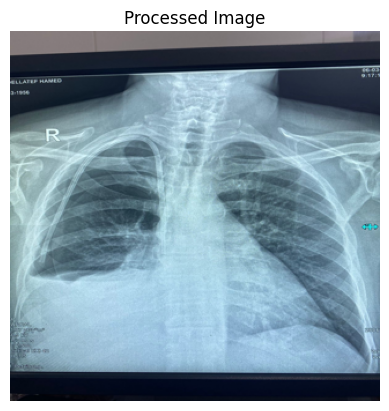

Predictions:
Cardiomegaly: Disease absent
Emphysema: Disease absent
Effusion: Disease absent
Hernia: Disease absent
Infiltration: Disease absent
Mass: Disease absent
Nodule: Disease absent
Atelectasis: Disease absent
Pneumothorax: Disease absent
Pleural_Thickening: Disease absent
Pneumonia: Disease absent
Fibrosis: Disease absent
Edema: Disease absent
Consolidation: Disease absent


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model


model = load_model("/content/chest_xray_model_pretrained.keras")


diseases = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
           'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']

def preprocess_image(image_path):
    
    img = Image.open(image_path)
    img = img.resize((320, 320))  
    img_array = np.array(img)
    img_array = img_array / 255.0  
    return img_array

def predict_image(image_path):
    
    img_array = preprocess_image(image_path)
    
    predictions = model.predict(np.expand_dims(img_array, axis=0))[0]  
    
    binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]
    return binary_predictions, img_array


image_path = "/content/WhatsApp Image 2024-03-11 at 12.59.12 PM.jpeg"
predictions, processed_image = predict_image(image_path)


plt.imshow(processed_image)
plt.axis('off')
plt.title('Processed Image')
plt.show()

print("Predictions:")
for i, disease in enumerate(diseases):
    if predictions[i] == 1:
        print(f"{disease}: Disease present")
    else:
        print(f"{disease}: Disease absent")


In [13]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model


model = load_model("/content/chest_xray_model_pretrained.keras")


diseases = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
           'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']

def preprocess_image(image_path):
    
    img = Image.open(image_path)
    img = img.resize((320, 320))  
    img_array = np.array(img)
    img_array = img_array / 255.0  
    return img_array

def predict_image(image_path):
    
    img_array = preprocess_image(image_path)
    
    predictions = model.predict(np.expand_dims(img_array, axis=0))[0]  
    
    binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]
    return binary_predictions, img_array


image_path = "/content/WhatsApp Image 2024-03-11 at 12.59.12 PM.jpeg"
predictions, processed_image = predict_image(image_path)


plt.imshow(processed_image)
plt.axis('off')
plt.title('Processed Image')
plt.show()

print("Predictions:")
for i, disease in enumerate(diseases):
    if predictions[i] == 1:
        print(f"{disease}: Disease present")
    else:
        print(f"{disease}: Disease absent")
